# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

In [ ]:
len(preprocessed_email)

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

In [ ]:
data.iloc[400]

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [ ]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    return (list_of_preproessed_emails,subject,text)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import os
import pickle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,MaxPooling1D
from tensorflow.keras.layers import Flatten,Dropout,concatenate,Input
from tensorflow.keras.layers import Embedding
import datetime
import numpy as np
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.callbacks import TensorBoard
%reload_ext tensorboard
import tensorflow as tf
import itertools
import re
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [5]:
!gdown  https://drive.google.com/uc?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM 

get_ipython().system_raw("unrar x documents.rar")

Downloading...
From: https://drive.google.com/uc?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM
To: /content/documents.rar
100% 19.0M/19.0M [00:00<00:00, 70.9MB/s]


Reference - https://stackoverflow.com/questions/50315989/how-to-extract-rar-files-inside-google-colab

In [6]:
os.listdir()

['.config', 'documents', 'documents.rar', 'sample_data']

In [7]:
#loading documents 
documents = os.listdir('documents')

In [8]:
#No. of documents loaded
len(documents)

18828

In [9]:
#checking loaded documents
documents[78]

'talk.religion.misc_83725.txt'

In [10]:
#Retrieveing text data from each document aand storing it 
data=[]

# 'i' is document name (ex - 'comp.os.ms-windows.misc_9921.txt')
for i in documents:
  # reading text file using 'r'  and appending it to data list
  with open('./documents/' + str(i),'r',encoding='utf8',errors='replace')as file:
    fc=file.read()
    data.append(fc)

In [11]:
# checking loaded text data
data[1]

"From: steveg@cadkey.com (Steve Gallichio)\nSubject: Re: Tie Breaker....(Isles and Devils)\n\n\n\nRex Wang (wangr@vccsouth22.its.rpi.edu) spews forth stupidly:\n> \tAre people here stupid or what??? It is a tie breaker, of cause they\n> have to have the same record. How can people be sooooo stuppid to put win as\n> first in the list for tie breaker??? If it is a tie breaker, how can there be\n> different record???? Man, I thought people in this net are good with hockey.\n> I might not be great in Math, but tell me how can two teams ahve the same\n> points with different record??? Man...retard!!!!!! Can't believe people\n> actually put win as first in a tie breaker......\n\nPLEASE PLEASE PLEASE tell me that you don't actually ATTEND Rensselaer, and\nthat you just work for ITS. Or that this was tounge-in-cheek.\n\nDoes this mean that I should be cutting off my alumni contributions, or \nincreasing them?\n\n-SG\n"

In [12]:
print(len(data))

18828


In [13]:
#getting class labels for each document
labels=[]

for i in documents:
  label=i.split('_')
  labels.append(label[0])

In [14]:
#checking extracted class label
labels[1]

'rec.sport.hockey'

In [15]:
#using set function to remove dupliacte labels stored in list
final_labels=set(labels)
len(final_labels)


20

In [16]:
#listing all 20 class labels
final_labels

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [17]:
list_of_emails=[] # conatins emails stored in each document(list of lists)
data_without_mail=[] # conatins text data without email ids
for text in data:
  #finding email pattern in text
  email = re.findall(r'[\w\.-]+@[\w\.-]+', text)
  for i in email:
    text = text.replace(i," ")
  data_without_mail.append(text)
  list_of_emails.append(email)

l1=[]
for emails in list_of_emails:
  l2=[]
  for each_email in emails:
    for j in range(len(each_email)):
      if(each_email[j]=='@'):
        text=each_email[j+1:].split('.')
        l2.append(text)
  l1.append(l2)

l3=[]
for each_doc_email_list in l1:
  l2=[]
  for each_email in each_doc_email_list:
    for word in each_email:
      if((len(word)>2) & (word!='com')):
        l2.append(word)
  l3.append(l2)

preprocessed_email=[]
for i in l3:
  s="" #blank string
  s=" ".join(i) #joining using spaces
  preprocessed_email.append(s)



In [18]:
preprocessed_email[70]

'alexia lis uiuc edu cnsvax uwec edu cnsvax uwec edu alexia lis uiuc edu cnsvax uwec edu alexia lis uiuc edu'

In [19]:
#Removing subject
subject=[]
data_without_sub=[]

for i in data_without_mail:
  sub=re.findall('Subject:.*',i)
  subject.append(sub)
  
  for j in sub:
    i=i.replace(str(j)," ")
  data_without_sub.append(i)

In [20]:
#Removing pucntuation
preprocessed_subject=[]

for i in subject:
  for word in i:
    word=word.replace("Subject: ",'')
    word=word.replace("Re: ",'')
    word=re.sub(r'[^a-zA-Z0-9 ]',r'',word)
  preprocessed_subject.append(word)


Reference - https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string

In [21]:
data_without_sub[1]

"From:   (Steve Gallichio)\n \n\n\n\nRex Wang ( ) spews forth stupidly:\n> \tAre people here stupid or what??? It is a tie breaker, of cause they\n> have to have the same record. How can people be sooooo stuppid to put win as\n> first in the list for tie breaker??? If it is a tie breaker, how can there be\n> different record???? Man, I thought people in this net are good with hockey.\n> I might not be great in Math, but tell me how can two teams ahve the same\n> points with different record??? Man...retard!!!!!! Can't believe people\n> actually put win as first in a tie breaker......\n\nPLEASE PLEASE PLEASE tell me that you don't actually ATTEND Rensselaer, and\nthat you just work for ITS. Or that this was tounge-in-cheek.\n\nDoes this mean that I should be cutting off my alumni contributions, or \nincreasing them?\n\n-SG\n"

In [22]:
data_without_write_from=[]

for line in data_without_sub:
  f=re.findall("Write to:.*",line)
  for j in f:
    line=line.replace(str(j),'')
  f=re.findall("From:.*",line)
  for j in f:
    line=line.replace(str(j),'')
  data_without_write_from.append(line)

In [23]:
data_without_write_from[1]

"\n \n\n\n\nRex Wang ( ) spews forth stupidly:\n> \tAre people here stupid or what??? It is a tie breaker, of cause they\n> have to have the same record. How can people be sooooo stuppid to put win as\n> first in the list for tie breaker??? If it is a tie breaker, how can there be\n> different record???? Man, I thought people in this net are good with hockey.\n> I might not be great in Math, but tell me how can two teams ahve the same\n> points with different record??? Man...retard!!!!!! Can't believe people\n> actually put win as first in a tie breaker......\n\nPLEASE PLEASE PLEASE tell me that you don't actually ATTEND Rensselaer, and\nthat you just work for ITS. Or that this was tounge-in-cheek.\n\nDoes this mean that I should be cutting off my alumni contributions, or \nincreasing them?\n\n-SG\n"

In [24]:
# Remove html tags
data_without_tag=[]
for i in data_without_write_from:
  s=re.findall('<.*?>',i)
  for j in s:
    i=i.replace(str(j),'')

  s=re.findall('\(.*\)',i)
  for j in s:
    i=i.replace(str(j),'')

  s=re.findall('\t',i)
  for j in s:
    i=i.replace(str(j),'')

  s=re.findall('\n',i)
  for j in s:
    i=i.replace(str(j),'')

  i = re.sub(r'[>|?|\|.|-]',r'',i)
  i = re.sub(r'[=|!|<]',r'',i)
  data_without_tag.append(i)

Reference- https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string

In [25]:
data_without_tag[1]


" Rex Wang  spews forth stupidly: Are people here stupid or what It is a tie breaker, of cause they have to have the same record How can people be sooooo stuppid to put win as first in the list for tie breaker If it is a tie breaker, how can there be different record Man, I thought people in this net are good with hockey I might not be great in Math, but tell me how can two teams ahve the same points with different record Manretard Can't believe people actually put win as first in a tie breakerPLEASE PLEASE PLEASE tell me that you don't actually ATTEND Rensselaer, andthat you just work for ITS Or that this was toungeincheekDoes this mean that I should be cutting off my alumni contributions, or increasing themSG"

In [26]:
data_without_colon=[]

for i in data_without_tag:
  for j in i.split():
    if(j[-1]==':'):
      i=i.replace(str(j),'')
  data_without_colon.append(i)


In [27]:
data_without_colon[1]

" Rex Wang  spews forth  Are people here stupid or what It is a tie breaker, of cause they have to have the same record How can people be sooooo stuppid to put win as first in the list for tie breaker If it is a tie breaker, how can there be different record Man, I thought people in this net are good with hockey I might not be great in Math, but tell me how can two teams ahve the same points with different record Manretard Can't believe people actually put win as first in a tie breakerPLEASE PLEASE PLEASE tell me that you don't actually ATTEND Rensselaer, andthat you just work for ITS Or that this was toungeincheekDoes this mean that I should be cutting off my alumni contributions, or increasing themSG"

In [28]:
data_without_contractions=[]
for phrase in data_without_colon:
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  data_without_contractions.append(phrase)

In [29]:
data_without_contractions[1]

' Rex Wang  spews forth  Are people here stupid or what It is a tie breaker, of cause they have to have the same record How can people be sooooo stuppid to put win as first in the list for tie breaker If it is a tie breaker, how can there be different record Man, I thought people in this net are good with hockey I might not be great in Math, but tell me how can two teams ahve the same points with different record Manretard Ca not believe people actually put win as first in a tie breakerPLEASE PLEASE PLEASE tell me that you do not actually ATTEND Rensselaer, andthat you just work for ITS Or that this was toungeincheekDoes this mean that I should be cutting off my alumni contributions, or increasing themSG'

Reference- https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

In [30]:
import nltk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Reference - https://stackoverflow.com/questions/31836058/nltk-named-entity-recognition-to-a-python-list

In [31]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import Tree

def get_continuous_chunks(text, label):
  chunked = ne_chunk(pos_tag(word_tokenize(text)))
  prev = None
  continuous_chunk = []
  current_chunk = []
  
  for subtree in chunked:
    if type(subtree) == Tree and subtree.label() == label:
      current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
    if current_chunk:
      named_entity = " ".join(current_chunk)
      if named_entity not in continuous_chunk:
        continuous_chunk.append(named_entity)
        current_chunk = []
    else:
      continue
  return continuous_chunk

In [32]:
def get_continuousgpe_chunks(text, label):
  chunked = ne_chunk(pos_tag(word_tokenize(text)))
  prev = None
  continuous_chunk = []
  word=[]
  continuos_word=[]
  current_chunk = []
  i=0
  for subtree in chunked:
    if type(subtree) == Tree and subtree.label() == label:
      i+=1
      current_chunk.append("_".join([token for token, pos in subtree.leaves()]))
      word.append(" ".join([token for token, pos in subtree.leaves()]))
    if current_chunk:
      named_entity = " ".join(current_chunk)
      named_word=" ".join(word)
      if named_entity not in continuous_chunk:
        continuous_chunk.append(named_entity)
        current_chunk = []
      if named_word not in continuos_word:
        continuos_word.append(named_word)
        word=[]
    else:
      continue
  return continuous_chunk,continuos_word


In [ ]:
data_after_chunking=[]

for i in data_without_contractions:
  p=get_continuous_chunks(i, "PERSON")
  for j in p:
    i=i.replace(str(j),'')
  g,w=get_continuousgpe_chunks(i, "GPE")
  for k in range(len(g)):
    i=i.replace(w[k],g[k])
  data_after_chunking.append(i)

In [32]:
print(data_after_chunking[1])

 In article    () responded to article   sdpaorg  who wrote:[DD]  Problem 1[DD][DD] My father told me the following story During the famous wars between the [DD] Armenians and the Persians, prince  performed [DD] extraordinary heroic deeds Three times in a single month he attacked the [DD] Persian troops The first time, he struck down half of the Persian army [DD] The second time, pursuing the Persians, he slaughtered one fourth of the [DD] soldiers The third time, he destroyed one eleventh of the Persian army [DD] The Persians who were still alive, numbering two hundred eighty, fled to [DD] Nakhichevan And so, from this remainder, find how many Persian soldiers [DD] there were before the massacre[Koc]  a280  a  1760Good for you You win the prize  a free trip to Karabakh as an Azeri soldier Now, calculate the odds of you coming back after trying to depopulatethe area of Armenians[Koc]  Armenians strike, slaughter, destroy, and massacre After[Koc] all, they are not as innocent as the as

In [33]:
data_without_digit=[]
for i in data_after_chunking:
  digits=re.findall('[0-9]+',i)
  for digit in digits:
    i=i.replace(digit,"")
  data_without_digit.append(i)


In [34]:
print(data_without_digit[1])

 In article    () responded to article   sdpaorg  who wrote:[DD]  Problem [DD][DD] My father told me the following story During the famous wars between the [DD] Armenians and the Persians, prince  performed [DD] extraordinary heroic deeds Three times in a single month he attacked the [DD] Persian troops The first time, he struck down half of the Persian army [DD] The second time, pursuing the Persians, he slaughtered one fourth of the [DD] soldiers The third time, he destroyed one eleventh of the Persian army [DD] The Persians who were still alive, numbering two hundred eighty, fled to [DD] Nakhichevan And so, from this remainder, find how many Persian soldiers [DD] there were before the massacre[Koc]  a  a  760Good for you You win the prize  a free trip to Karabakh as an Azeri soldier Now, calculate the odds of you coming back after trying to depopulatethe area of Armenians[Koc]  Armenians strike, slaughter, destroy, and massacre After[Koc] all, they are not as innocent as the asala n

In [35]:
data_without_underscore=[]
for i in data_without_digit:
  for word in i.split():
    if word.startswith('_'):
      i=i.replace(word[0],"")
    if word.endswith("_"):
      i=i.replace(word[-1],"")
  data_without_underscore.append(i)


In [36]:
data_without_underscore[1]

' In article    () responded to article   sdpaorg  who wrote:[DD]  Problem [DD][DD] My father told me the following story During the famous wars between the [DD] Armenians and the Persians, prince  performed [DD] extraordinary heroic deeds Three times in a single month he attacked the [DD] Persian troops The first time, he struck down half of the Persian army [DD] The second time, pursuing the Persians, he slaughtered one fourth of the [DD] soldiers The third time, he destroyed one eleventh of the Persian army [DD] The Persians who were still alive, numbering two hundred eighty, fled to [DD] Nakhichevan And so, from this remainder, find how many Persian soldiers [DD] there were before the massacre[Koc]  a  a  760Good for you You win the prize  a free trip to Karabakh as an Azeri soldier Now, calculate the odds of you coming back after trying to depopulatethe area of Armenians[Koc]  Armenians strike, slaughter, destroy, and massacre After[Koc] all, they are not as innocent as the asala 

In [37]:
data_removing_underscore=[]
for i in data_without_underscore:
  for word in i.split():
    k=word.split('_')
    if(len(k)>1):
      if(len(k[0])<=2):
        i=i.replace(str(word),k[1])
  data_removing_underscore.append(i)


In [38]:
data_removing_underscore[1]

' In article    () responded to article   sdpaorg  who wrote:[DD]  Problem [DD][DD] My father told me the following story During the famous wars between the [DD] Armenians and the Persians, prince  performed [DD] extraordinary heroic deeds Three times in a single month he attacked the [DD] Persian troops The first time, he struck down half of the Persian army [DD] The second time, pursuing the Persians, he slaughtered one fourth of the [DD] soldiers The third time, he destroyed one eleventh of the Persian army [DD] The Persians who were still alive, numbering two hundred eighty, fled to [DD] Nakhichevan And so, from this remainder, find how many Persian soldiers [DD] there were before the massacre[Koc]  a  a  760Good for you You win the prize  a free trip to Karabakh as an Azeri soldier Now, calculate the odds of you coming back after trying to depopulatethe area of Armenians[Koc]  Armenians strike, slaughter, destroy, and massacre After[Koc] all, they are not as innocent as the asala 

In [39]:
#LowerCase
data_after_lowercase=[]
for i in data_removing_underscore:
  j= ' '.join([w for w in i.split() if len(w)>2])
  i_new=' '.join([w for w in j.split() if (len(w)<=15)])
  data_after_lowercase.append(i_new.lower())


In [40]:
data_after_lowercase[1]

'article responded article sdpaorg who wrote:[dd] problem [dd][dd] father told the following story during the famous wars between the [dd] armenians and the persians, prince performed [dd] extraordinary heroic deeds three times single month attacked the [dd] persian troops the first time, struck down half the persian army [dd] the second time, pursuing the persians, slaughtered one fourth the [dd] soldiers the third time, destroyed one eleventh the persian army [dd] the persians who were still alive, numbering two hundred eighty, fled [dd] nakhichevan and so, from this remainder, find how many persian soldiers [dd] there were before the massacre[koc] 760good for you you win the prize free trip karabakh azeri soldier now, calculate the odds you coming back after trying depopulatethe area armenians[koc] armenians strike, slaughter, destroy, and massacre after[koc] all, they are not innocent the asala network did not notice any mention shirak, trebizon this seventh century these places we

In [41]:
preprocessed_text=[]
for i in data_after_lowercase:
  i=re.sub(r'[^A-Za-z_ ]','',i)
  preprocessed_text.append(i)


In [42]:
preprocessed_text[1]

'article responded article sdpaorg who wrotedd problem dddd father told the following story during the famous wars between the dd armenians and the persians prince performed dd extraordinary heroic deeds three times single month attacked the dd persian troops the first time struck down half the persian army dd the second time pursuing the persians slaughtered one fourth the dd soldiers the third time destroyed one eleventh the persian army dd the persians who were still alive numbering two hundred eighty fled dd nakhichevan and so from this remainder find how many persian soldiers dd there were before the massacrekoc good for you you win the prize free trip karabakh azeri soldier now calculate the odds you coming back after trying depopulatethe area armenianskoc armenians strike slaughter destroy and massacre afterkoc all they are not innocent the asala network did not notice any mention shirak trebizon this seventh century these places were filled with armenians the end  after the tur

In [43]:
len(preprocessed_text)

18828

In [44]:
print(preprocessed_email[1])
print("*"*50)
print(preprocessed_subject[1])
print("*"*50)
print(preprocessed_text[1])


urartu sdpa org flop ENGR ORST EDU rize ECE ORST EDU urartu sdpa org urartu urartu sdpa org
**************************************************
Seventh Century AD Armenian Math Problems
**************************************************
article responded article sdpaorg who wrotedd problem dddd father told the following story during the famous wars between the dd armenians and the persians prince performed dd extraordinary heroic deeds three times single month attacked the dd persian troops the first time struck down half the persian army dd the second time pursuing the persians slaughtered one fourth the dd soldiers the third time destroyed one eleventh the persian army dd the persians who were still alive numbering two hundred eighty fled dd nakhichevan and so from this remainder find how many persian soldiers dd there were before the massacrekoc good for you you win the prize free trip karabakh azeri soldier now calculate the odds you coming back after trying depopulatethe area armen

In [45]:
data=pd.DataFrame({"text":data[0],"class":labels,"preprocessed_text":preprocessed_text,"preprocessed_subject":preprocessed_subject,"preprocessed_email":preprocessed_email})


In [46]:
data.head()

,text,class,preprocessed_text,preprocessed_subject,preprocessed_email
0,From: feustel@netcom.com (David Feustel)\nSubj...,sci.crypt,and the fox has rabies too nmyi,The Escrow Database,netcom netcom
1,From: feustel@netcom.com (David Feustel)\nSubj...,talk.politics.mideast,article responded article sdpaorg who wrotedd ...,Seventh Century AD Armenian Math Problems,urartu sdpa org flop ENGR ORST EDU rize ECE OR...
2,From: feustel@netcom.com (David Feustel)\nSubj...,comp.sys.mac.hardware,fair number brave souls who upgraded their clo...,SI Clock Poll Final Call,carson washington edu washington edu
3,From: feustel@netcom.com (David Feustel)\nSubj...,comp.sys.mac.hardware,article writesa while ago when owned plus and ...,Torx T15 Screwdriver,golum riv csu edu austin ibm austin ibm csu ed...
4,From: feustel@netcom.com (David Feustel)\nSubj...,sci.crypt,article writesso not just think replacements f...,Would clipper make a good cover for other encr...,netcom eff org eff org


In [47]:
data.iloc[1]


text                    From: feustel@netcom.com (David Feustel)\nSubj...
class                                               talk.politics.mideast
preprocessed_text       article responded article sdpaorg who wrotedd ...
preprocessed_subject            Seventh Century AD Armenian Math Problems
preprocessed_email      urartu sdpa org flop ENGR ORST EDU rize ECE OR...
Name: 1, dtype: object

In [48]:
data['preprocessed_data']=data['preprocessed_text']+" "+data['preprocessed_subject']+" "+data['preprocessed_email']


In [49]:
data.head()


,text,class,preprocessed_text,preprocessed_subject,preprocessed_email,preprocessed_data
0,From: feustel@netcom.com (David Feustel)\nSubj...,sci.crypt,and the fox has rabies too nmyi,The Escrow Database,netcom netcom,and the fox has rabies too nmyi The Escrow Dat...
1,From: feustel@netcom.com (David Feustel)\nSubj...,talk.politics.mideast,article responded article sdpaorg who wrotedd ...,Seventh Century AD Armenian Math Problems,urartu sdpa org flop ENGR ORST EDU rize ECE OR...,article responded article sdpaorg who wrotedd ...
2,From: feustel@netcom.com (David Feustel)\nSubj...,comp.sys.mac.hardware,fair number brave souls who upgraded their clo...,SI Clock Poll Final Call,carson washington edu washington edu,fair number brave souls who upgraded their clo...
3,From: feustel@netcom.com (David Feustel)\nSubj...,comp.sys.mac.hardware,article writesa while ago when owned plus and ...,Torx T15 Screwdriver,golum riv csu edu austin ibm austin ibm csu ed...,article writesa while ago when owned plus and ...
4,From: feustel@netcom.com (David Feustel)\nSubj...,sci.crypt,article writesso not just think replacements f...,Would clipper make a good cover for other encr...,netcom eff org eff org,article writesso not just think replacements f...


In [50]:
with open('data_cnn.pickle', 'wb') as handle:
  pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [51]:
with open('data_cnn.pickle', 'rb') as handle:
  data = pickle.load(handle)

In [52]:
y=data['class']
X=data.drop('class',axis=1)

In [53]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,stratify=y,test_size=0.25)
X_train

,text,preprocessed_text,preprocessed_subject,preprocessed_email,preprocessed_data
17487,From: feustel@netcom.com (David Feustel)\nSubj...,the waco quizwhat would you the following hypo...,Take the WACO QUIZ Impress your friends Win ...,chinet chi chinet chinet,the waco quizwhat would you the following hypo...
15809,From: feustel@netcom.com (David Feustel)\nSubj...,writesit was not was from behindtrottier was g...,Plus minus stat,ramsey laurentian sms business uwo sms busines...,writesit was not was from behindtrottier was g...
3540,From: feustel@netcom.com (David Feustel)\nSubj...,article the holocaust memorial costly and dang...,The US Holocaust Memorial Museum A Costly and ...,scubed minerva harvard edu minerva harvard edu...,article the holocaust memorial costly and dang...
1373,From: feustel@netcom.com (David Feustel)\nSubj...,article writes the selective service registrat...,ABOLISH SELECTIVE SERVICE,bnr convex convex convex head-cfa harvard edu,article writes the selective service registrat...
10244,From: feustel@netcom.com (David Feustel)\nSubj...,writesyou all mention that the algorithm class...,Clipper Chip Reverse Engineering,plato boeing utdallas bitnet,writesyou all mention that the algorithm class...
...,...,...,...,...,...
7359,From: feustel@netcom.com (David Feustel)\nSubj...,article great interview with cnn larry king li...,Binyamin Netanyahu on CNN tonight,world std world std cmu edu cmu edu,article great interview with cnn larry king li...
11540,From: feustel@netcom.com (David Feustel)\nSubj...,pity you did not say something about the use s...,New Study Out On Gay Percentage,uhura rochester edu news cso uiuc edu uxa cso ...,pity you did not say something about the use s...
17334,From: feustel@netcom.com (David Feustel)\nSubj...,article article brings around asking open ques...,Prophetic Warning to New York City,socs uts edu athos rutgers edu spot Colorado E...,article article brings around asking open ques...
9596,From: feustel@netcom.com (David Feustel)\nSubj...,was just wondering one thing actually two hope...,Lead Acid batteries Concrete,rtsg mot astro ocis temple edu rtsg mot,was just wondering one thing actually two hope...


In [54]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y_train)
y_train_label = tf.keras.utils.to_categorical(vec, 20)
print(y_train_label.shape)

label_encoder_test = LabelEncoder()
vec_test = label_encoder_test.fit_transform(y_test)
y_test_label = tf.keras.utils.to_categorical(vec_test, 20)

print(y_test_label.shape)

(14121, 20)
(4707, 20)


In [55]:
np.random.seed(101)
t = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^`{|}~\t\n', oov_token="<OOV>")
t.fit_on_texts(X_train['preprocessed_data'])

#Sequencing
sequencing_docs_train= t.texts_to_sequences(X_train['preprocessed_data'])
sequencing_docs_test= t.texts_to_sequences(X_test['preprocessed_data'])


In [56]:
max_length_padding=[]
for i in sequencing_docs_train:
  max_length_padding.append(len(i))
print("Maximum Padding size-",max(max_length_padding))


Maximum Padding size- 8568


Tried the padding size and its taking lot of time. So im going with 1000

In [57]:
padded_docs_train = pad_sequences(sequencing_docs_train, maxlen=1000, padding='post')
padded_docs_test = pad_sequences(sequencing_docs_test, maxlen=1000, padding='post')

In [58]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)

In [60]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [61]:
import io
embeddings_index = {}
f = open('glove.6B.100d.txt')

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [62]:
embedding_matrix = np.zeros((len(t.word_index) + 1, 100))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector


In [63]:
vocab_size=len(t.word_index) + 1
vocab_size


176372

In [64]:
class F1score(tf.keras.callbacks.Callback):
  def __init__(self,x_test,y_test):
    super(F1score,self).__init__()
    self.x_test=x_test
    self.y_test=y_test
    self.history={'auc': [],'F1_score':[]}

  def on_epoch_end(self, epoch, logs={}):
    f1=0
    y_pred=self.model.predict(self.x_test)
    metrix1=[]
    for val in y_pred:
      y_val=np.argmax(val)
      arr=np.zeros(20,dtype=int)
      arr[y_val]=1
      metrix1.append(arr)
    f1=f1_score(self.y_test,np.array(metrix1),average='micro')
    print("The F1 score for this epoch is: ",f1)


In [65]:
from tensorflow.keras.layers import Input
from numpy.random import seed

In [66]:
seed(1)
tf.random.set_seed(2)
tf.keras.backend.clear_session()

input = Input(shape=(1000,),dtype='int32')
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=1000, trainable=True)(input)

x1=Conv1D(3,7,kernel_initializer='glorot_uniform',activation='relu')(e)
x2=Conv1D(3,8,kernel_initializer='glorot_uniform',activation='relu')(e)
x3=Conv1D(3,6,kernel_initializer='glorot_uniform',activation='relu')(e)

concatted1= concatenate([x1,x2,x3],axis=1)

max_pool1=MaxPooling1D(3)(concatted1)

y1=Conv1D(3,9,kernel_initializer='glorot_uniform',activation='relu')(max_pool1)
y2=Conv1D(3,4,kernel_initializer='glorot_uniform',activation='relu')(max_pool1)
y3=Conv1D(3,5,kernel_initializer='glorot_uniform',activation='relu')(max_pool1)

concatted2 =concatenate([y1,y2,y3],axis=1)

max_pool2=MaxPooling1D(3)(concatted2)
drop_out=Dropout(0.5)(max_pool2)
max_pool3=MaxPooling1D(3)(drop_out)

conv_layer1=Conv1D(3,12, activation='relu')(max_pool3)

flatten=Flatten()(conv_layer1)
drop_out2=Dropout(0.5)(flatten)
dense_layer1=Dense(100, activation='relu')(drop_out2)

output_layer=Dense(20, activation='softmax')(dense_layer1)

optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

earlystop = EarlyStopping(monitor='accuracy', min_delta=0.00, patience=2, verbose=1)

f1score=F1score(x_test=padded_docs_test,y_test=y_test_label)

model = Model(inputs=input,outputs=output_layer)

callback_list = [tensorboard_callback,earlystop,f1score]

history=model.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1000, 100)    17637200    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 994, 3)       2103        ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 993, 3)       2403        ['embedding[0][0]']              
                                                                                              

In [67]:
history=model.fit(padded_docs_train, y_train_label, epochs=20,validation_data=(padded_docs_test, y_test_label),verbose=1,callbacks=callback_list)

print(history.history)


Epoch 1/20
442/442 [==============================] - 234s 525ms/step - loss: 2.9019 - accuracy: 0.0814 - val_loss: 2.7086 - val_accuracy: 0.1096
Epoch 2/20
442/442 [==============================] - 224s 508ms/step - loss: 2.2252 - accuracy: 0.2418 - val_loss: 1.9075 - val_accuracy: 0.3340
Epoch 3/20
442/442 [==============================] - 220s 498ms/step - loss: 1.7471 - accuracy: 0.3860 - val_loss: 1.5900 - val_accuracy: 0.4487
Epoch 4/20
442/442 [==============================] - 225s 508ms/step - loss: 1.5716 - accuracy: 0.4505 - val_loss: 1.5839 - val_accuracy: 0.4580
Epoch 5/20
442/442 [==============================] - 215s 488ms/step - loss: 1.4648 - accuracy: 0.4851 - val_loss: 1.3905 - val_accuracy: 0.5218
Epoch 6/20
442/442 [==============================] - 226s 511ms/step - loss: 1.3796 - accuracy: 0.5134 - val_loss: 1.4009 - val_accuracy: 0.5258
Epoch 7/20
442/442 [==============================] - 225s 509ms/step - loss: 1.3126 - accuracy: 0.5361 - val_loss: 1.2789 -

In [68]:
model.save_weights('model1weights.h5')

In [69]:
print("Accuracy->",(history.history['accuracy'][-1])*100)

Accuracy-> 71.3688850402832


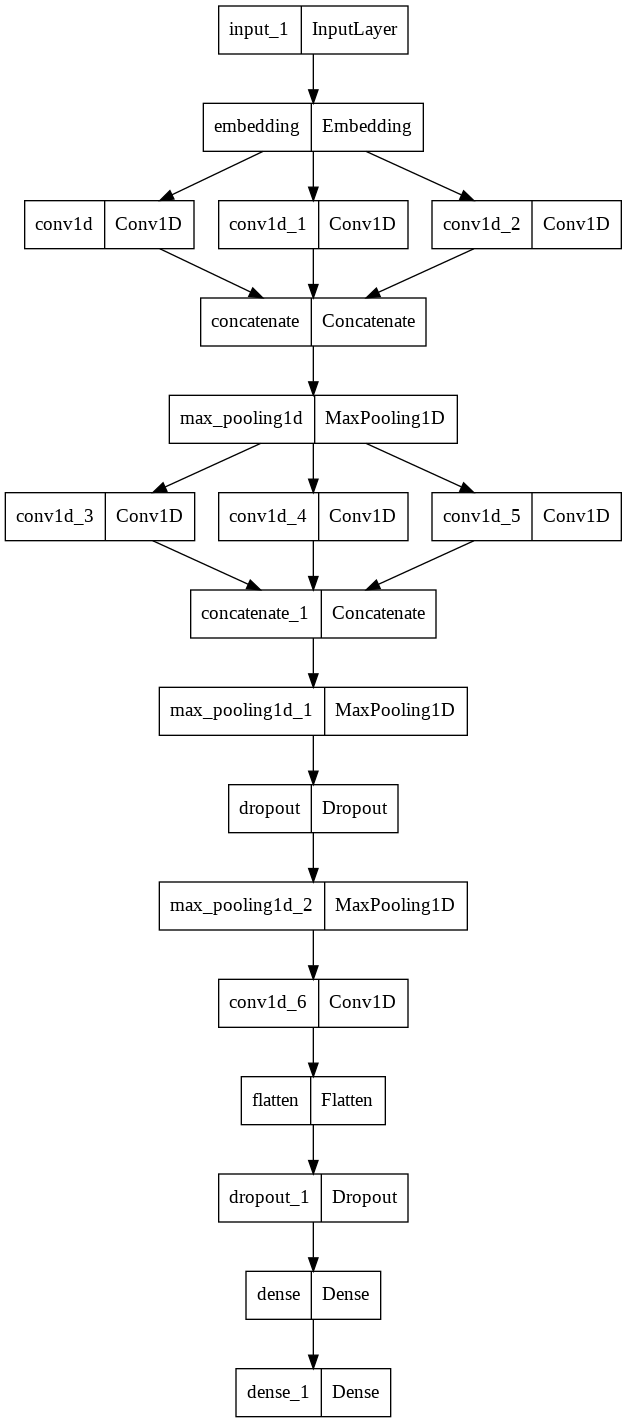

In [70]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=False,show_layer_names=True,rankdir='TB',expand_nested=False,dpi=96)

In [73]:
np.random.seed(7)
tc = Tokenizer(num_words=None, char_level=True, oov_token='UNK',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tc.fit_on_texts(X_train['preprocessed_data'])

alphabet = "abcdefghijklmnopqrstuvwxyz"
char_dict = {}
for i, char in enumerate(alphabet):
  char_dict[char] = i + 1

tc.word_index = char_dict.copy()

tc.word_index[tc.oov_token] = max(char_dict.values()) + 1


In [74]:
sequencing_chardocs_train= tc.texts_to_sequences(X_train['preprocessed_data'])
sequencing_chardocs_test= tc.texts_to_sequences(X_test['preprocessed_data'])


In [75]:
len(sequencing_chardocs_test)


4707

In [76]:
max_length_padding=[]
for i in sequencing_chardocs_train:
  max_length_padding.append(len(i))
print("Maximum Padding size-",max(max_length_padding))


Maximum Padding size- 64612


In [77]:
max_length=1010

As the padding size is high ill take 1010

In [78]:
padded_chardocs_train = pad_sequences(sequencing_chardocs_train, maxlen=max_length, padding='post')
padded_chardocs_test = pad_sequences(sequencing_chardocs_test, maxlen=max_length, padding='post')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [79]:
vocab_size=len(tc.word_index)+1
vocab_size

28

In [80]:
embedding_weights=[]
embedding_weights.append(np.zeros(vocab_size))
for char, i in tc.word_index.items():
  onehot = np.zeros(vocab_size)
  onehot[i - 1] = 1
  embedding_weights.append(onehot)

embedding_weights = np.array(embedding_weights)

print(embedding_weights.shape)


(28, 28)


In [81]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2) 
tf.keras.backend.clear_session()

inputs=Input(shape=(max_length,),dtype='int32')
e = Embedding(vocab_size,28, weights=[embedding_weights], input_length=max_length, trainable=True)(inputs)

x1=Conv1D(3,7,kernel_initializer='glorot_uniform',activation='relu')(e)
x2=Conv1D(3,8,kernel_initializer='glorot_uniform',activation='relu')(x1)

max_pool1=MaxPooling1D(3)(x2)

y1=Conv1D(3,9,kernel_initializer='glorot_uniform',activation='relu')(max_pool1)
y2=Conv1D(3,4,kernel_initializer='glorot_uniform',activation='relu')(y1)

max_pool2=MaxPooling1D(3)(y2)
flatten=Flatten()(max_pool2)
drop_out1=Dropout(0.5)(flatten)
dense_layer1=Dense(100, activation='relu')(drop_out1)

output_layer=Dense(20, activation='softmax')(dense_layer1)

optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

earlystop = EarlyStopping(monitor='accuracy', min_delta=0.00, patience=2, verbose=1)
f1score=F1score(x_test=padded_chardocs_test,y_test=y_test_label)

model2 = Model(inputs=inputs,outputs=output_layer)

callback_list = [tensorboard_callback,earlystop,f1score]

model2.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])

print(model2.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1010)]            0         
                                                                 
 embedding (Embedding)       (None, 1010, 28)          784       
                                                                 
 conv1d (Conv1D)             (None, 1004, 3)           591       
                                                                 
 conv1d_1 (Conv1D)           (None, 997, 3)            75        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 332, 3)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 324, 3)            84        
                                                             

In [82]:
history2=model2.fit(padded_chardocs_train, y_train_label, epochs=20,validation_data=(padded_chardocs_test, y_test_label),verbose=1,callbacks=callback_list)


Epoch 1/20
442/442 [==============================] - 154s 347ms/step - loss: 2.9804 - accuracy: 0.0582 - val_loss: 2.9544 - val_accuracy: 0.0850
Epoch 2/20
442/442 [==============================] - 118s 267ms/step - loss: 2.9510 - accuracy: 0.0786 - val_loss: 2.9387 - val_accuracy: 0.0805
Epoch 3/20
442/442 [==============================] - 118s 266ms/step - loss: 2.9403 - accuracy: 0.0850 - val_loss: 2.9397 - val_accuracy: 0.0894
Epoch 4/20
442/442 [==============================] - 116s 262ms/step - loss: 2.9329 - accuracy: 0.0845 - val_loss: 2.9197 - val_accuracy: 0.0943
Epoch 5/20
442/442 [==============================] - 117s 264ms/step - loss: 2.9172 - accuracy: 0.0952 - val_loss: 2.8936 - val_accuracy: 0.1016
Epoch 6/20
442/442 [==============================] - 119s 270ms/step - loss: 2.8763 - accuracy: 0.1003 - val_loss: 2.8622 - val_accuracy: 0.1030
Epoch 7/20
442/442 [==============================] - 116s 263ms/step - loss: 2.8133 - accuracy: 0.1071 - val_loss: 2.7530 -

In [90]:
model2.save('model2weights.h5')


In [91]:
print("Accuracy->",(history2.history['accuracy'][-1])*100)


Accuracy-> 16.047021746635437


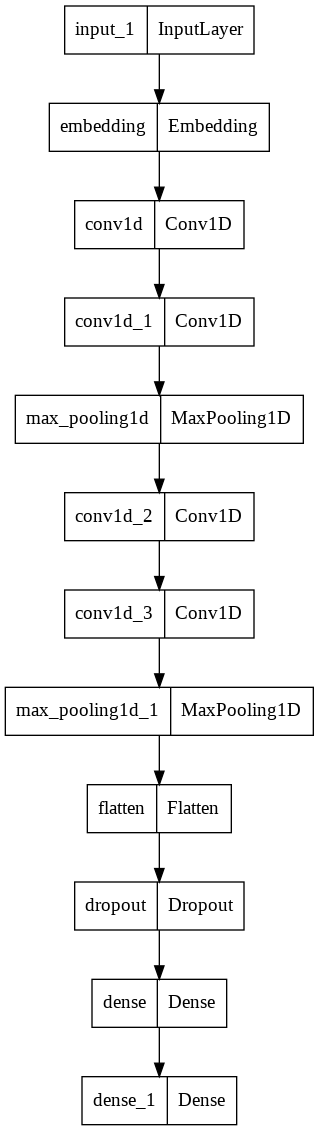

In [92]:
tf.keras.utils.plot_model(model2,to_file='model.png',show_shapes=False,show_layer_names=True,rankdir='TB',expand_nested=False,dpi=96)
